In [2]:
import numpy as np
import rasterio
import cv2
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [3]:
building_mask_path = r"..\data\raw\Building_Mask_Example_1.tif"
flat_roof_mask_path = r"..\data\raw\Reproj_30cm_London_Flat_Roofs_Example_1.tif"
sat_image_path = r"..\data\raw\102220103020-1030050093F91800-visual.tif"

In [19]:
building_mask = cv2.imread(building_mask_path, cv2.IMREAD_UNCHANGED)
building_mask = building_mask.astype(np.uint8)

flat_roof_mask = cv2.imread(flat_roof_mask_path, cv2.IMREAD_UNCHANGED)
flat_roof_mask = flat_roof_mask.astype(np.uint8)

sat_image = cv2.imread(sat_image_path, cv2.COLOR_BGR2RGB)
sat_image = sat_image.astype(np.uint8)

In [5]:
building_contours, contour_hierarchy = cv2.findContours(building_mask, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

In [73]:
# Initialise a black image to be filled with contours
out = np.zeros((building_mask.shape[0], building_mask.shape[1]))

# Iterate through the contours, adding them one by one into the black image
for i, contour in enumerate(building_contours):
    if (contour_hierarchy[0, i, 3] == -1):
        cv2.drawContours(out, [contour], -1, 1, 2)

In [9]:
out = np.zeros((building_mask.shape[0], building_mask.shape[1]))

for i, contour in enumerate(building_contours):
    if (contour_hierarchy[0, i, 3] == -1):

        M = cv2.moments(contour)

        if M['m00'] != 0:

            centre_x = int(M['m10']/M['m00'])
            centre_y = int(M['m01']/M['m00'])
            cv2.drawContours(out, [contour], -1, 1, 2)

            cv2.circle(out, (centre_x, centre_y), 7, 1, -1)

In [39]:
# Adapted from https://www.geeksforgeeks.org/python-opencv-find-center-of-contour/
white_arr = np.full((sat_image.shape[0], sat_image.shape[1], 3), 255)

for i, contour in enumerate(building_contours):
    if (contour_hierarchy[0, i, 3] == -1):

        M = cv2.moments(contour)

        if M['m00'] != 0:

            centre_x = int(M['m10']/M['m00'])
            centre_y = int(M['m01']/M['m00'])

            if cv2.contourArea(contour) > 250:

                if (2048 < centre_x < building_mask.shape[0] - 1024) and (2048 < centre_y < building_mask.shape[1] - 1024):

                    sat_image_mask = np.zeros((sat_image.shape[0], sat_image.shape[1], 3)).astype(np.uint8)
                    cv2.drawContours(sat_image_mask, [contour], -1, color=(255, 255, 255), thickness=cv2.FILLED)

                    masked_sat_image = cv2.bitwise_and(sat_image, sat_image_mask)
                    print(i, np.unique(masked_sat_image))
                    # masked_sat_image = sat_image[:, :, sat_image_mask == 1]

                    left_boundary = centre_x - 128
                    right_boundary = centre_x + 128            
                    bottom_boundary = centre_y - 128
                    top_boundary = centre_y + 128
                    
                    sat_img_tile = masked_sat_image[left_boundary:right_boundary, bottom_boundary:top_boundary, :]
                    cv2.imwrite(f"../data/interim/Satellite tiles/sat_image_tile_{i}.tif", sat_img_tile)
            

1825 [0]
1841 [0]
1843 [0]


KeyboardInterrupt: 

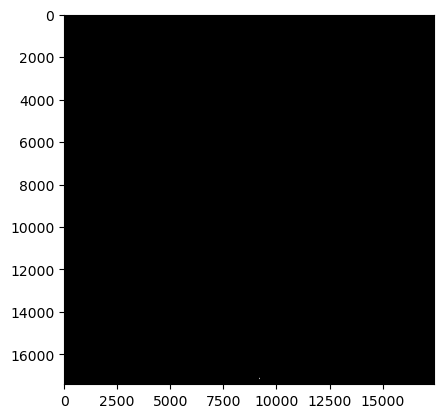

In [36]:
plt.imshow(sat_image_mask)

In [37]:
np.unique(sat_image_mask)

array([  0, 255], dtype=uint8)

In [22]:
cv2.imwrite(r"..\data\interim\sat_image_mask.png", sat_image)

True

In [9]:
cv2.imwrite(r"..\data\interim\sat_image_mask.tif", sat_image_mask)

True